# Assignment 3
Name: Kesar Shrivastava

Roll number: 2019051

# Question 1

# (a)

All the itemsets in the dataframe are arranged in decreasing order of their support values.

Higher support values indicate high presence of the itemset in the different recipes.

In [53]:
pip install apyori

In [54]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import random
import copy
import operator
import ast
from apyori import apriori

In [55]:
# reading the json file
df = pd.read_json("train.json")
df_ingredients = df['ingredients'].tolist()

In [56]:
# creating the ingredients basket to get the number of ingredients
ingredient_basket = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in ingredient_basket:
      pass
    else:
      ingredient_basket.append(ingredient)

print("Number of unique ingredients: ", len(ingredient_basket))

Number of unique ingredients:  6714


In [57]:
# Defining required functions

# This function finds support value of a record in a result in apriori
def find_supportValue(result):
  s = str(result)
  i1 = s.find('support')
  i2 = s.find(',',i1)
  val = float(s[i1+8:i2])
  return val

# This gives the ingredients in the result of apriori
def get_ingredient(result):
  s = str(result)
  i1 = s.find('frozenset')
  i2 = s.find('support')
  return s[i1+10:i2-3]

# helper function to create the dataframe of the output of apriori
def create_df(result):
  _df = {'Ingredient':[],'Support Value':[]}
  for record in result:
    _df['Ingredient'].append(get_ingredient(record))
    _df['Support Value'].append(find_supportValue(record))
  _df = pd.DataFrame(_df)
  return _df

# this gives the itemset of desired size slicing out the itemsets of less sizes
def get_itemset(result,size):
  _result = copy.deepcopy(result)
  for i in range(len(_result)):
    record = str(_result[i])
    i1 = record.find('frozenset')
    i2 = record.find('support')
    s = record[i1+10:i2-3]
    d = ast.literal_eval(s)
    if len(d)!=size:
      result.remove(_result[i])
  return result

# arrange association rules in dataframe
def arrange_rules(result):
  for record in result:
    _df = {'Base':[],'Added itemset':[], 'Confidence':[]}
    s = str(record)
    # print(s)
    i1 = s.find("ordered_statistics")
    l = s[i1+19:len(s)-1]
    f1 = 0
    print(l)
    while 0<1:
      # print(l.find('ordered_statistics'))
      if(l.find("frozenset",f1)==-1):
        break
      else:
        f1 = l.find("frozenset")
        f1_c = l.find(")",f1)
        if l[f1+10]==')':
          _df['Base'].append("")
        else:
          _df['Base'].append(l[f1+10:f1_c])
        print(l[f1+10:f1_c])
        f1 = l.find("frozenset",f1_c)
        f1_c = l.find(")",f1)
        _df['Added itemset'].append(l[f1+10:f1_c])
        con = l.find("confidence",f1_c)
        con_ = l.find(",",con)
        _df['Confidence'].append(float(l[con+11:con_]))
        f1 = con_
    new_df = pd.DataFrame(_df)
    print(new_df)

**1-itemsets**

Trying out different support values until we get around five itemsets

In [58]:
results = list(apriori(df_ingredients,min_support=0.001,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  1137
                    Ingredient  Support Value
912                   {'salt'}       0.453764
723                 {'onions'}       0.200432
719              {'olive oil'}       0.200407
1091                 {'water'}       0.187484
475                 {'garlic'}       0.185548
...                        ...            ...
97           {'black vinegar'}       0.001006
1084            {'vermicelli'}       0.001006
789             {'pita bread'}       0.001006
1098  {'white cheddar cheese'}       0.001006
370            {'ear of corn'}       0.001006

[1137 rows x 2 columns]


0.001 support value gives 1137 itemsets. Here we can see that at the end the support value of the itemsets are same. This is because these items are used sparsely. Hence, for the next epoch we will reduce the support value significantly to obtain the itemsets with best support value.

In [59]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  194
                   Ingredient  Support Value
159                  {'salt'}       0.453764
137                {'onions'}       0.200432
135             {'olive oil'}       0.200407
184                 {'water'}       0.187484
88                 {'garlic'}       0.185548
..                        ...            ...
181       {'vegetable broth'}       0.010283
51   {'cracked black pepper'}       0.010258
172         {'spring onions'}       0.010233
143               {'peanuts'}       0.010208
32              {'chickpeas'}       0.010107

[194 rows x 2 columns]


With support value 0.01, the number of itemsets are significantly reduced. However, reducing it further for best results.

In [60]:
results = list(apriori(df_ingredients,min_support=0.05,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  25
                    Ingredient  Support Value
18                    {'salt'}       0.453764
16                  {'onions'}       0.200432
15               {'olive oil'}       0.200407
24                   {'water'}       0.187484
7                   {'garlic'}       0.185548
20                   {'sugar'}       0.161764
8            {'garlic cloves'}       0.156786
2                   {'butter'}       0.121864
10     {'ground black pepper'}       0.120280
0        {'all-purpose flour'}       0.116458
17                  {'pepper'}       0.111580
23           {'vegetable oil'}       0.110248
5                     {'eggs'}       0.085181
19               {'soy sauce'}       0.082868
12             {'kosher salt'}       0.078267
9             {'green onions'}       0.077387
21                {'tomatoes'}       0.076884
13              {'large eggs'}       0.074119
3                  {'carrots'}       0.070750
22         {'unsalted butter'}       0.069945
11  

Support value 0.05 gives 25 itemsets with quite classic ingredients at the top like salt, onions, water, garlic, and sugar.

In [61]:
results = list(apriori(df_ingredients,min_support=0.1,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  12
                 Ingredient  Support Value
8                  {'salt'}       0.453764
6                {'onions'}       0.200432
5             {'olive oil'}       0.200407
11                {'water'}       0.187484
2                {'garlic'}       0.185548
9                 {'sugar'}       0.161764
3         {'garlic cloves'}       0.156786
1                {'butter'}       0.121864
4   {'ground black pepper'}       0.120280
0     {'all-purpose flour'}       0.116458
7                {'pepper'}       0.111580
10        {'vegetable oil'}       0.110248


Increasing the support value to 0.1 has sliced out many itemsets and left the frequent ingredients. These are the ingredients that have the highest frequency.

In [62]:
results = list(apriori(df_ingredients,min_support=0.15,max_length=1))
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  7
          Ingredient  Support Value
4           {'salt'}       0.453764
3         {'onions'}       0.200432
2      {'olive oil'}       0.200407
6          {'water'}       0.187484
0         {'garlic'}       0.185548
5          {'sugar'}       0.161764
1  {'garlic cloves'}       0.156786


Here, we can see the with support value 0.15 we get the most frequent ingredients used in the recipes. These are the ingredients which will occur the most frequently in the association rules that we will generate in part (b)

**2-itemsets**

In [63]:
results = list(apriori(df_ingredients,min_support=0.001,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  8977
                                             Ingredient  Support Value
7964                                 {'onions', 'salt'}       0.110424
7831                              {'olive oil', 'salt'}       0.105018
8607                                  {'water', 'salt'}       0.099563
8185                                 {'pepper', 'salt'}       0.096646
5661                                 {'garlic', 'salt'}       0.094258
...                                                 ...            ...
7718                                   {'nori', 'salt'}       0.001006
1254  {'ground ginger', 'boneless skinless chicken b...       0.001006
2598                   {'curry powder', 'chili powder'}       0.001006
5331                         {'leeks', 'fresh parsley'}       0.001006
5732               {'sesame oil', 'garlic chili sauce'}       0.001006

[8977 rows x 2 columns]


Setting support value 0.001 gives 8977 itemsets. Their presence in the recipes are rare and hence we need to increase the support value.

In [64]:
results = list(apriori(df_ingredients,min_support=0.005,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  1042
                                       Ingredient  Support Value
905                            {'onions', 'salt'}       0.110424
885                         {'olive oil', 'salt'}       0.105018
990                             {'water', 'salt'}       0.099563
933                            {'pepper', 'salt'}       0.096646
600                            {'garlic', 'salt'}       0.094258
..                                            ...            ...
556                    {'fresh rosemary', 'salt'}       0.005003
478            {'fresh lime juice', 'fish sauce'}       0.005003
317                         {'cinnamon', 'sugar'}       0.005003
952               {'red bell pepper', 'tomatoes'}       0.005003
687  {'ground black pepper', 'green bell pepper'}       0.005003

[1042 rows x 2 columns]


0.005 support value too does not give the most frequent itemsets. These 2-itemsets do not occur in many recipes given in the dataset.

In [65]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  341
                          Ingredient  Support Value
285               {'onions', 'salt'}       0.110424
276            {'olive oil', 'salt'}       0.105018
319                {'water', 'salt'}       0.099563
294               {'pepper', 'salt'}       0.096646
180               {'garlic', 'salt'}       0.094258
..                               ...            ...
326   {'scallions', 'vegetable oil'}       0.010032
269             {'soy sauce', 'oil'}       0.010032
178       {'purple onion', 'garlic'}       0.010032
69   {'cayenne pepper', 'olive oil'}       0.010007
112         {'curry powder', 'salt'}       0.010007

[341 rows x 2 columns]


Here, we get much less itemsets and we can see that many of the itemsets have the most frequent 1-itemsets as their subsets. This is because those were frequent hence their superset too are frequent.

In [66]:
results = list(apriori(df_ingredients,min_support=0.08,max_length=2))
results = get_itemset(results,2)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  5
              Ingredient  Support Value
2     {'onions', 'salt'}       0.110424
1  {'olive oil', 'salt'}       0.105018
4      {'water', 'salt'}       0.099563
3     {'pepper', 'salt'}       0.096646
0     {'garlic', 'salt'}       0.094258


Now, we get the best support. All the sets are permutation and combination of the ingredients found in 1-itemset.

**3-itemsets**

In [67]:
results = list(apriori(df_ingredients,min_support=0.004,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  813
                                            Ingredient  Support Value
493                       {'garlic', 'onions', 'salt'}       0.040353
732                       {'pepper', 'onions', 'salt'}       0.033741
748                        {'water', 'onions', 'salt'}       0.031176
711                    {'olive oil', 'onions', 'salt'}       0.030246
486                    {'olive oil', 'garlic', 'salt'}       0.029793
..                                                 ...            ...
71   {'whole milk', 'all-purpose flour', 'unsalted ...       0.004023
695                {'minced garlic', 'onions', 'salt'}       0.004023
692                  {'milk', 'vegetable oil', 'salt'}       0.004023
278           {'jalapeno chilies', 'cilantro', 'salt'}       0.004023
734              {'vegetable oil', 'pepper', 'onions'}       0.004023

[813 rows x 2 columns]


0.004 support value does not give the top itemsets. We need to increase the support for the next epoch.

In [68]:
results = list(apriori(df_ingredients,min_support=0.009,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  136
                                            Ingredient  Support Value
72                        {'garlic', 'onions', 'salt'}       0.040353
118                       {'pepper', 'onions', 'salt'}       0.033741
124                        {'water', 'onions', 'salt'}       0.031176
112                    {'olive oil', 'onions', 'salt'}       0.030246
70                     {'olive oil', 'garlic', 'salt'}       0.029793
..                                                 ...            ...
115           {'red bell pepper', 'olive oil', 'salt'}       0.009127
131                 {'vegetable oil', 'sugar', 'salt'}       0.009127
5    {'baking powder', 'all-purpose flour', 'unsalt...       0.009101
25                   {'baking powder', 'eggs', 'salt'}       0.009076
55                          {'eggs', 'onions', 'salt'}       0.009026

[136 rows x 2 columns]


Here, we can see that even after increasing the support value the number of itemsets does not decrease much due to the size of itemsets.

In [69]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  95
                                          Ingredient  Support Value
51                      {'garlic', 'onions', 'salt'}       0.040353
84                      {'pepper', 'onions', 'salt'}       0.033741
88                       {'water', 'onions', 'salt'}       0.031176
79                   {'olive oil', 'onions', 'salt'}       0.030246
49                   {'olive oil', 'garlic', 'salt'}       0.029793
..                                               ...            ...
94              {'soy sauce', 'sesame oil', 'sugar'}       0.010107
28                   {'butter', 'olive oil', 'salt'}       0.010082
68    {'ground black pepper', 'olive oil', 'onions'}       0.010057
56                       {'sugar', 'garlic', 'salt'}       0.010057
12  {'vanilla extract', 'all-purpose flour', 'salt'}       0.010007

[95 rows x 2 columns]


Here, also the frequent ingredients are the combination of the topmost 1-itemsets.

In [70]:
results = list(apriori(df_ingredients,min_support=0.02,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  16
                                        Ingredient  Support Value
6                     {'garlic', 'onions', 'salt'}       0.040353
14                    {'pepper', 'onions', 'salt'}       0.033741
15                     {'water', 'onions', 'salt'}       0.031176
12                 {'olive oil', 'onions', 'salt'}       0.030246
5                  {'olive oil', 'garlic', 'salt'}       0.029793
7                     {'pepper', 'garlic', 'salt'}       0.029416
13                 {'olive oil', 'pepper', 'salt'}       0.029265
9           {'salt', 'olive oil', 'garlic cloves'}       0.028411
3           {'all-purpose flour', 'sugar', 'salt'}       0.023986
11    {'ground black pepper', 'olive oil', 'salt'}       0.023960
8                      {'garlic', 'water', 'salt'}       0.023608
1          {'butter', 'all-purpose flour', 'salt'}       0.023483
0   {'baking powder', 'all-purpose flour', 'salt'}       0.021924
10             {'salt', 'onions', 'garlic clov

With 0.02 support value we get the most frequent combination of the ingredients used in the recipes. These combination are the classic ingredients used frequently in the many recipes.

In [71]:
results = list(apriori(df_ingredients,min_support=0.03,max_length=3))
results = get_itemset(results,3)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  4
                        Ingredient  Support Value
0     {'garlic', 'onions', 'salt'}       0.040353
2     {'pepper', 'onions', 'salt'}       0.033741
3      {'water', 'onions', 'salt'}       0.031176
1  {'olive oil', 'onions', 'salt'}       0.030246


For this support value we get the most frequent 3-itemsets. We will create association rules for these itemsets which will tell the confidence of the ingredients getting used in the recipe if other related ingredients are getting used.

**4-itemsets**

In [72]:
results = list(apriori(df_ingredients,min_support=0.006,max_length=4))
results = get_itemset(results,4)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  34
                                           Ingredient  Support Value
19             {'pepper', 'garlic', 'onions', 'salt'}       0.014105
21              {'water', 'garlic', 'onions', 'salt'}       0.012621
17          {'olive oil', 'garlic', 'onions', 'salt'}       0.012244
18          {'pepper', 'olive oil', 'garlic', 'salt'}       0.010685
30          {'olive oil', 'pepper', 'onions', 'salt'}       0.010359
3   {'baking powder', 'all-purpose flour', 'sugar'...       0.010007
8   {'all-purpose flour', 'sugar', 'large eggs', '...       0.009831
32              {'water', 'pepper', 'onions', 'salt'}       0.009252
11  {'all-purpose flour', 'sugar', 'unsalted butte...       0.008850
9   {'unsalted butter', 'all-purpose flour', 'larg...       0.008071
20           {'tomatoes', 'garlic', 'onions', 'salt'}       0.007568
1   {'baking powder', 'butter', 'all-purpose flour...       0.007568
16  {'ground black pepper', 'garlic', 'onions', 's...       0.007467
0   

Here, 34 itemsets are created with less support value. Reason lies in the infrequency of use of the ingredients together.

In [73]:
results = list(apriori(df_ingredients,min_support=0.008,max_length=4))
results = get_itemset(results,4)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  10
                                          Ingredient  Support Value
6             {'pepper', 'garlic', 'onions', 'salt'}       0.014105
7              {'water', 'garlic', 'onions', 'salt'}       0.012621
4          {'olive oil', 'garlic', 'onions', 'salt'}       0.012244
5          {'pepper', 'olive oil', 'garlic', 'salt'}       0.010685
8          {'olive oil', 'pepper', 'onions', 'salt'}       0.010359
0  {'baking powder', 'all-purpose flour', 'sugar'...       0.010007
1  {'all-purpose flour', 'sugar', 'large eggs', '...       0.009831
9              {'water', 'pepper', 'onions', 'salt'}       0.009252
3  {'all-purpose flour', 'sugar', 'unsalted butte...       0.008850
2  {'unsalted butter', 'all-purpose flour', 'larg...       0.008071


Increasing the support value a little bit slices out many itemsets and gives us the frequent itemsets.

In [74]:
results = list(apriori(df_ingredients,min_support=0.01,max_length=4))
results = get_itemset(results,4)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  6
                                          Ingredient  Support Value
3             {'pepper', 'garlic', 'onions', 'salt'}       0.014105
4              {'water', 'garlic', 'onions', 'salt'}       0.012621
1          {'olive oil', 'garlic', 'onions', 'salt'}       0.012244
2          {'pepper', 'olive oil', 'garlic', 'salt'}       0.010685
5          {'olive oil', 'pepper', 'onions', 'salt'}       0.010359
0  {'baking powder', 'all-purpose flour', 'sugar'...       0.010007


0.01 acts as the best support as gives us the topmost itemsets.

**5-itemsets**

In [75]:
results = list(apriori(df_ingredients,min_support=0.003,max_length=5))
results = get_itemset(results,5)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  11
                                           Ingredient  Support Value
9   {'pepper', 'onions', 'olive oil', 'garlic', 's...       0.004827
7   {'all-purpose flour', 'sugar', 'large eggs', '...       0.004651
3   {'all-purpose flour', 'sugar', 'large eggs', '...       0.004551
10    {'pepper', 'onions', 'garlic', 'salt', 'water'}       0.004324
5   {'all-purpose flour', 'sugar', 'baking powder'...       0.003972
1   {'all-purpose flour', 'sugar', 'baking soda', ...       0.003671
0   {'all-purpose flour', 'baking soda', 'baking p...       0.003646
2   {'all-purpose flour', 'sugar', 'baking powder'...       0.003419
8   {'all-purpose flour', 'sugar', 'large eggs', '...       0.003294
4   {'all-purpose flour', 'large eggs', 'baking po...       0.003118
6   {'all-purpose flour', 'sugar', 'large eggs', '...       0.003092


Since we have incresed the size of the itemsets, a small support value too gives much less itemsets. This is because the probability of five ingredients getting used in more than one recipe is not so frequent.

In [76]:
results = list(apriori(df_ingredients,min_support=0.004,max_length=5))
results = get_itemset(results,5)
print("Total number of itemsets: ",len(results))
ans = create_df(results)
ans = ans.sort_values('Support Value', ascending=False)
print(ans)

Total number of itemsets:  4
                                          Ingredient  Support Value
2  {'pepper', 'onions', 'olive oil', 'garlic', 's...       0.004827
1  {'all-purpose flour', 'sugar', 'large eggs', '...       0.004651
0  {'all-purpose flour', 'sugar', 'large eggs', '...       0.004551
3    {'pepper', 'onions', 'garlic', 'salt', 'water'}       0.004324


Support value of 0.004 gives the best support value and most frequent 5-itemsets.

# (b)

**1-itemset**

As seen from (a) **0.18** gives us the top 5 itemsets.

The itemsets are

*   salt
*   onions
*   olive oil
*   water
*   garlic







In [77]:
results = list(apriori(df_ingredients,min_support = 0.18,max_length = 1))
results

[RelationRecord(items=frozenset({'garlic'}), support=0.18554834816714436, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'garlic'}), confidence=0.18554834816714436, lift=1.0)]),
 RelationRecord(items=frozenset({'olive oil'}), support=0.20040730125207423, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'olive oil'}), confidence=0.20040730125207423, lift=1.0)]),
 RelationRecord(items=frozenset({'onions'}), support=0.2004324433046714, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'onions'}), confidence=0.2004324433046714, lift=1.0)]),
 RelationRecord(items=frozenset({'salt'}), support=0.45376376527379697, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'salt'}), confidence=0.45376376527379697, lift=1.0)]),
 RelationRecord(items=frozenset({'water'}), support=0.18748428621712676, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=froz

**2-itemset**

**0.08** is the best support to give the top 5 itemsets



*   salt, onions
*   salt, olive oil
* salt, water
* pepper, salt
* salt, garlic


In [78]:
results = list(apriori(df_ingredients,min_support = 0.08,max_length = 2))
results = get_itemset(results,2)
results

[RelationRecord(items=frozenset({'garlic', 'salt'}), support=0.09425755518680545, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'garlic', 'salt'}), confidence=0.09425755518680545, lift=1.0), OrderedStatistic(items_base=frozenset({'garlic'}), items_add=frozenset({'salt'}), confidence=0.5079945799457996, lift=1.119513321296777), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'garlic'}), confidence=0.2077238475177305, lift=1.1195133212967767)]),
 RelationRecord(items=frozenset({'olive oil', 'salt'}), support=0.10501835369839593, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'olive oil', 'salt'}), confidence=0.10501835369839593, lift=1.0), OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'salt'}), confidence=0.5240245891356166, lift=1.1548400935438836), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'olive oil'}), confidence=0.23143838652482268, li

**3-itemset**

**0.0297** best support value


* salt, onions, garlic
* pepper, salt, onions
* salt, onions, water
* salt, onions, olive oil
* olive oil, salt, garlic

In [79]:
results = list(apriori(df_ingredients,min_support = 0.0297,max_length = 3))
results = get_itemset(results,3)
results

[RelationRecord(items=frozenset({'olive oil', 'garlic', 'salt'}), support=0.029793332327651228, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'olive oil', 'garlic', 'salt'}), confidence=0.029793332327651228, lift=1.0), OrderedStatistic(items_base=frozenset({'garlic'}), items_add=frozenset({'olive oil', 'salt'}), confidence=0.16056910569105692, lift=1.5289623197883884), OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'garlic', 'salt'}), confidence=0.14866390666164847, lift=1.5772094488024557), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'olive oil', 'garlic'}), confidence=0.06565824468085106, lift=1.2555245307385432), OrderedStatistic(items_base=frozenset({'olive oil', 'garlic'}), items_add=frozenset({'salt'}), confidence=0.5697115384615384, lift=1.2555245307385432), OrderedStatistic(items_base=frozenset({'garlic', 'salt'}), items_add=frozenset({'olive oil'}), confidence=0.3160842891437716, lift=1.5

**4-itemset**

**0.0103** best support value

* pepper, salt, onions, garlic
* salt, onions, water, garlic
* olive oil, salt, onions, garlic
* pepper, olive oil, salt, garlic
* pepper, salt, onions, olive oil

In [80]:
results = list(apriori(df_ingredients,min_support = 0.0103,max_length = 4))
results = get_itemset(results,4)
results

[RelationRecord(items=frozenset({'olive oil', 'garlic', 'onions', 'salt'}), support=0.012244179614823754, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'olive oil', 'garlic', 'onions', 'salt'}), confidence=0.012244179614823754, lift=1.0), OrderedStatistic(items_base=frozenset({'garlic'}), items_add=frozenset({'olive oil', 'onions', 'salt'}), confidence=0.06598915989159891, lift=2.18175631382249), OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'garlic', 'onions', 'salt'}), confidence=0.061096474720863124, lift=1.5140505828957072), OrderedStatistic(items_base=frozenset({'onions'}), items_add=frozenset({'olive oil', 'garlic', 'salt'}), confidence=0.061088810837932765, lift=2.050418871112184), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'olive oil', 'garlic', 'onions'}), confidence=0.02698359929078014, lift=1.3449193962299364), OrderedStatistic(items_base=frozenset({'olive oil', 'garlic'}), items_add=

**5-itemset**

**0.003972** best support value

* salt, baking powder, sugar, large eggs, all-purpose flour
* salt, unsalted butter, baking powder, sugar, all-purpose flour
* salt, unsalted butter, sugar, large eggs, all-purpose flour
* pepper, garlic, salt, onions, olive oil
* pepper, salt, onions, water, garlic

In [81]:
results = list(apriori(df_ingredients,min_support = 0.003972,max_length = 5))
results = get_itemset(results,5)
results

[RelationRecord(items=frozenset({'all-purpose flour', 'sugar', 'large eggs', 'baking powder', 'salt'}), support=0.0045507115200885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'baking powder', 'all-purpose flour', 'sugar', 'large eggs', 'salt'}), confidence=0.0045507115200885, lift=1.0), OrderedStatistic(items_base=frozenset({'all-purpose flour'}), items_add=frozenset({'baking powder', 'sugar', 'large eggs', 'salt'}), confidence=0.039075993091537135, lift=6.846733697016732), OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'all-purpose flour', 'sugar', 'large eggs', 'salt'}), confidence=0.10414269275028769, lift=10.593788903964047), OrderedStatistic(items_base=frozenset({'large eggs'}), items_add=frozenset({'baking powder', 'all-purpose flour', 'sugar', 'salt'}), confidence=0.06139755766621438, lift=6.1357448708944995), OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'baking powder', 'all-purpose 

# (c)

The interpretations are as follows:
* The top itemsets of size 1 denote the most frequent ingredients used in many recipes. These ingredients include salt, onion, olive oil, water, and garlic. This is because they are ubiquitous and cheap. Salt adds to the taste and is added to many recipes therefore the support value of salt is close to 0.5 This implies that it is used in almost half of the recipes.
* In the 2-itemsets, from the association rules made the maximum confidence is when salt is added to the recipes containing pepper. These rules tell the probability that an ingredient will be used when an another ingredient is getting used. These food pairings are the most common as they taste well and have evolved like that.
*  However, as we increase the size of the itemsets the probability that they occur together in any recipe decreases due to the different food pairings followed in different cuisines. It is quite unlikely that the ingredient combination that is used in Indian cuisine would be used in the Irish cuisine and hence there are less itemsets with greater support values for higher itemsets.
* The food pariring for some of the ingredients is sometimes also becuase of the evolutionary factors. Different species follow different pathways. However, similarity in the pathways lead to sharing of their flavor profile and increases their tendency of getting used in any recipe together as seen from the association rules also.
* Looking at the itemsets of size 5 the support values to get the top itemsets decreases a lot. This is because this size has significant amount of recipes as seen from the recipe size distribution. Hence, these itemsets comprise of a typical recipe in a monkey cuisine making the ingredients highly unlikely to occur in any other recipe. This conclusion makes sense along with the recipe size distribution also.

# Question 2

In [111]:
# reading the file
df = pd.read_json("train.json")
df_ingredients = df['ingredients'].tolist()

In [112]:
s = []
for index,row in df.iterrows():
  s.append(len(row['ingredients']))

df['length'] = s
# df.sort_values()
df = df.sort_values('length',ascending=False)

In [84]:
df

,id,cuisine,ingredients,length
15289,3885,italian,"[fettucine, fresh marjoram, minced garlic, oli...",65
30350,13430,brazilian,"[marshmallows, fresh corn, cheddar cheese, shr...",59
26103,13049,mexican,"[vanilla ice cream, lime, garlic powder, zucch...",52
10513,49282,mexican,"[condensed cream of chicken soup, pepper, refr...",49
22906,2253,indian,"[white vinegar, sparkling lemonade, coconut su...",49
...,...,...,...,...
32105,12805,japanese,[water],1
21008,39221,italian,[cherry tomatoes],1
34531,10816,greek,[phyllo],1
18136,39186,thai,[jasmine rice],1


In [98]:
# creating the ingredients basket
ingredient_basket = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in ingredient_basket:
      pass
    else:
      ingredient_basket.append(ingredient)

# calculate frequency of each ingredient
ingredient_frequency = {}
for index,row in df.iterrows():
  ingredient_list = row['ingredients']
  for ingredient in ingredient_list:
    if ingredient in ingredient_frequency:
      ingredient_frequency[ingredient] = ingredient_frequency[ingredient]+1
    else:
      ingredient_frequency[ingredient] = 1

In [103]:
# function to plot the recipe size
def plot_recipeSize(recipes,t):
  size = {}
  for index, row in recipes.iterrows():
    ingredients = row['ingredients']
    length = len(ingredients)
    if length in size:
      size[length] = size[length]+1
    else:
      size[length] = 1
  
  sorted_list = sorted(size.keys())
  y_list = []
  total = 0
  for r in sorted_list:
    y_list.append(size[r])
    total = total+size[r]
  for i in range(len(y_list)):
    y_list[i] = y_list[i]/total
  x_axis = sorted_list
  y_axis = y_list
  plt.plot(x_axis, y_axis)
  plt.xlabel("Recipe size")
  plt.ylabel("Percentage")
  plt.title(t)
  plt.show()

# function to plot the frequency rank distribution
def plot_frequencyRank(recipes,t):
  d = {}
  for index,row in recipes.iterrows():
    ingredients = row['ingredients']
    for i in ingredients:
      if i in d:
        d[i] = d[i]+1
      else:
        d[i] = 1
  sorted_matrix = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
  sorted_dict = {}

  for i in range(len(sorted_matrix)):
    sorted_dict[i] = sorted_matrix[i][1]

  x_axis = list(sorted_dict.keys())
  y_axis = list(sorted_dict.values())

  plt.loglog(x_axis,y_axis)
  plt.title(t)
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.show()

# (a)
The randomised control has been built using the strategy 1. The original dataset is iterated and corresponding to every recipe, the same number of ingredients are sampled without replacement as the size of the recipe.

As given in the strategy 1, we need to build this random cuisine at least 100 times for statistical analysis but for showing purpose showing it 10 times.


Here, the parameters that are kept constant are
* The number of ingredients: the list of ingredients are created using the original dataset. In the randomised control, the ingredients are sampled uniformly without replacement.
* The number of recipes: Since we iterate over the whole dataset the number of recipes are contant in the random control.
* Recipe size distribution: This plots the percentage of number of recipes against the recipe size. Since the number of recipes is same and the size of every recipe is same as the original dataset the recipe size distribution in constant.

In [88]:
# function to create the random cuisine using strategy 1
def create_RandomCuisine():
  new_df = {'id':[],'cuisine':[],'ingredients':[]}
  for index,row in df.iterrows():
    recipe = row['ingredients']
    recipe_size = len(recipe)
    new_recipe = []
    indices = []

    # for all the ingredient in the recipe choosing one random ingredient from the ingredient basket
    for i in range(recipe_size):
      index = random.randint(0,len(ingredient_basket)-1)
      indices.append(index)
      new_recipe.append(ingredient_basket[index])
      # ensuring without replacement
      ingredient_basket.remove(ingredient_basket[index])

    # appending the new recipe to the cuisine
    new_df['id'].append(row['id'])
    new_df['cuisine'].append(row['cuisine'])
    new_df['ingredients'].append(new_recipe)

    # restoring the ingredient basket
    for i in range(recipe_size):
      ingredient_basket.insert(indices[i],new_recipe[i])

  new_df = pd.DataFrame(new_df)
  plot_frequencyRank(new_df,"Frequency Rank Distribution of random control")
  plot_recipeSize(new_df, "Recipe Size Distribution of random control")
  print(new_df)
  plot_frequencyRank(df,"Frequency Rank Distribution of original dataset")
  plot_recipeSize(df, "Recipe Size Distribution of original dataset")  
  print()

Please observe that for every call the frequency rank distribution and the recipe size distribution of the random cuisine is plotted. Then the newly formed dataset is shown and the original plots are shown to draw a comparison.

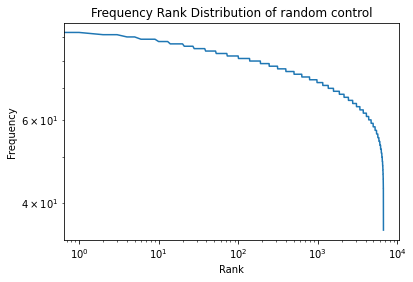

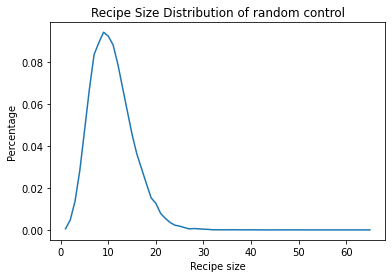

          id     cuisine                                        ingredients
0       3885     italian  [extra firm tofu, top loin steaks, cabbage, JO...
1      13430   brazilian  [pico de gallo, fermented bean curd, Potatoes ...
2      13049     mexican  [center cut pork chops, wagon wheels, baked co...
3      49282     mexican  [yellow mustard, Fuji Apple, Classico Pasta Sa...
4       2253      indian  [bouillon cube, cantaloupe, Progresso Artichok...
...      ...         ...                                                ...
39769  12805    japanese                                   [smoked sausage]
39770  39221     italian                                      [gala apples]
39771  10816       greek                                [sirloin tip steak]
39772  39186        thai                                   [red bean paste]
39773   7833  vietnamese                                        [guanabana]

[39774 rows x 3 columns]


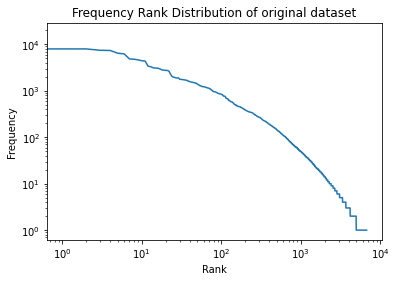

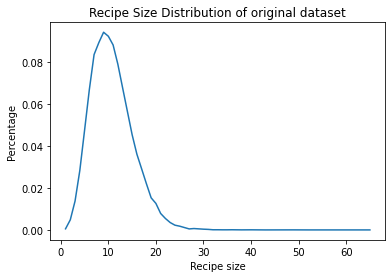

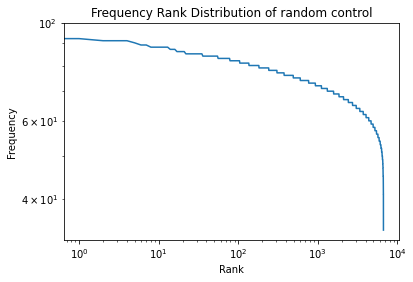

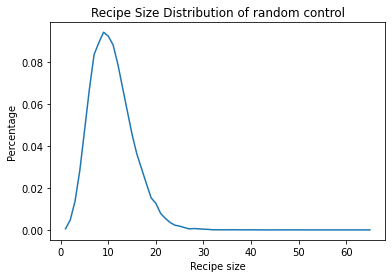

          id     cuisine                                        ingredients
0       3885     italian  [ginger piece, cornflour, haricot beans, conge...
1      13430   brazilian  [beefsteak tomatoes, prepared pie crusts, pota...
2      13049     mexican  [earl grey tea bags, chili garlic paste, peach...
3      49282     mexican  [pound cake mix, instant coffee, Equal Sweeten...
4       2253      indian  [frozen cod fillets, free range egg, tandoori ...
...      ...         ...                                                ...
39769  12805    japanese                                 [brown rice penne]
39770  39221     italian                       [Progresso Balsamic Vinegar]
39771  10816       greek                              [shoulder lamb chops]
39772  39186        thai                                       [roast beef]
39773   7833  vietnamese                                      [prune juice]

[39774 rows x 3 columns]


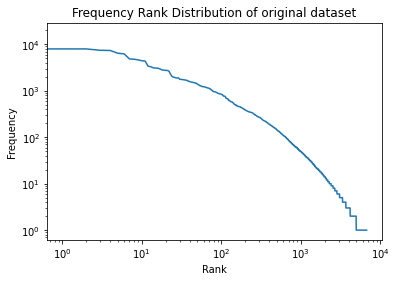

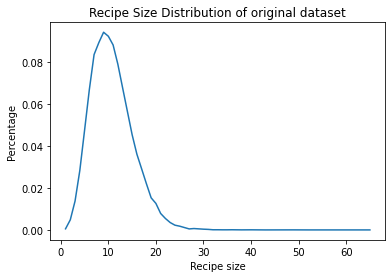

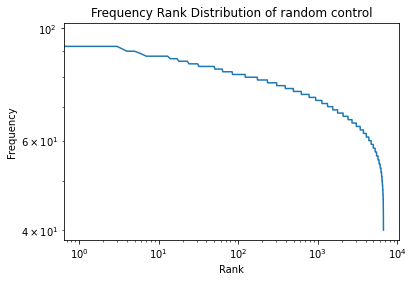

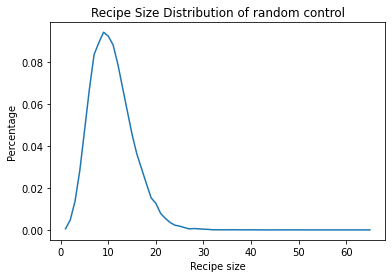

          id     cuisine                                        ingredients
0       3885     italian  [beef stew, english breakfast tea, japanese cu...
1      13430   brazilian  [Ragu Traditional Sauce, creole spice mix, che...
2      13049     mexican  [long green, cactus, torpedo rolls, hearts of ...
3      49282     mexican  [chicken leg quarters, croissant dough, deli h...
4       2253      indian  [extra, riblets, bagels, solid pack pumpkin, b...
...      ...         ...                                                ...
39769  12805    japanese                                             [idli]
39770  39221     italian                                    [barley flakes]
39771  10816       greek                                     [small shells]
39772  39186        thai                                    [yellow squash]
39773   7833  vietnamese                             [golden mushroom soup]

[39774 rows x 3 columns]


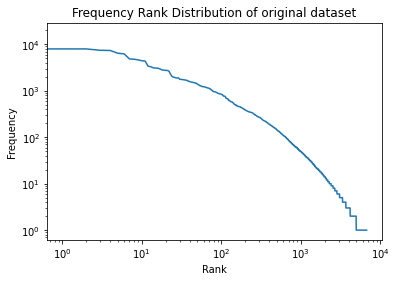

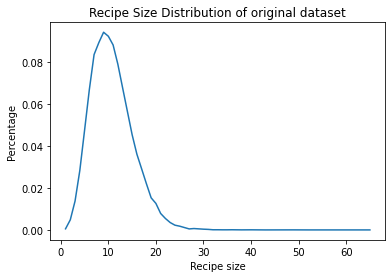

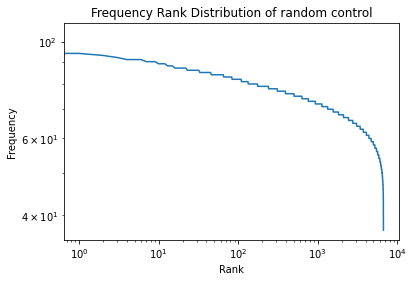

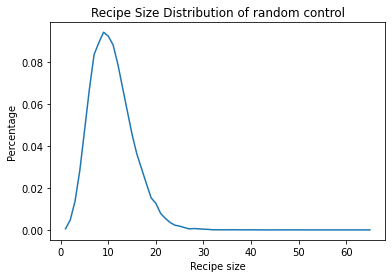

          id     cuisine                                        ingredients
0       3885     italian  [dry yeast, nonfat mozzarella cheese, spinach ...
1      13430   brazilian  [citrus juice, yellowfin tuna, cherry vinegar,...
2      13049     mexican  [basa fillets, ground flaxseed, umeboshi, sals...
3      49282     mexican  [old ginger, basmati rice, orange zest, hillsh...
4       2253      indian  [dark muscovado sugar, macaroni, veal bones, c...
...      ...         ...                                                ...
39769  12805    japanese                                   [head on shrimp]
39770  39221     italian                                     [lotus leaves]
39771  10816       greek                            [chicken broth low fat]
39772  39186        thai                             [fresh poblano pepper]
39773   7833  vietnamese                                      [paella rice]

[39774 rows x 3 columns]


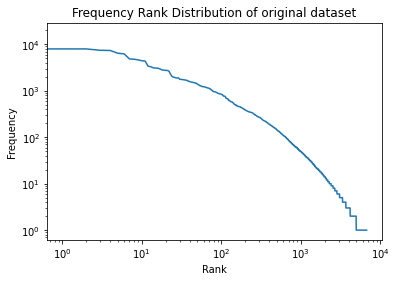

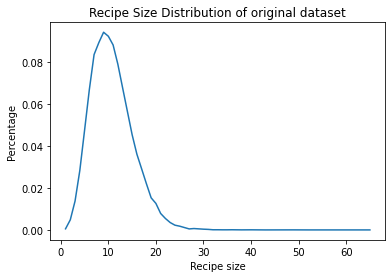

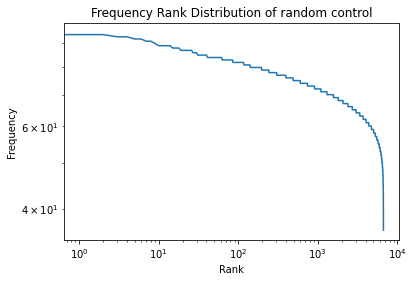

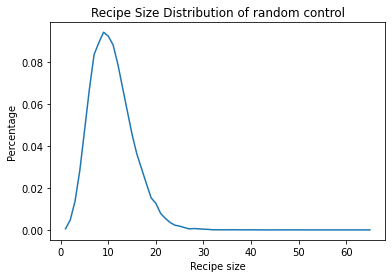

          id     cuisine                                        ingredients
0       3885     italian  [chili powder, canned chicken broth, turkey gi...
1      13430   brazilian  [fishcake, roma tomatoes, peach purée, collard...
2      13049     mexican  [carbonated beverages, Red Gold® diced tomatoe...
3      49282     mexican  [lesser galangal, white creme de cacao, bird p...
4       2253      indian  [chicken soup base, thai black glutinous rice,...
...      ...         ...                                                ...
39769  12805    japanese                                     [pastry cream]
39770  39221     italian                                  [poblano chilies]
39771  10816       greek                                           [sesame]
39772  39186        thai                           [low-fat cottage cheese]
39773   7833  vietnamese               [unsweetened shredded dried coconut]

[39774 rows x 3 columns]


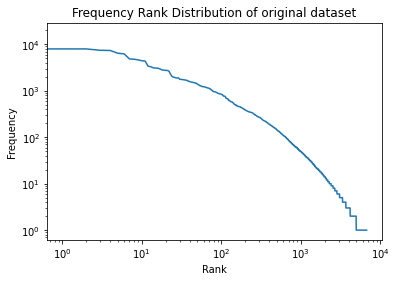

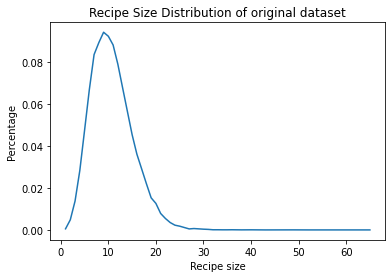

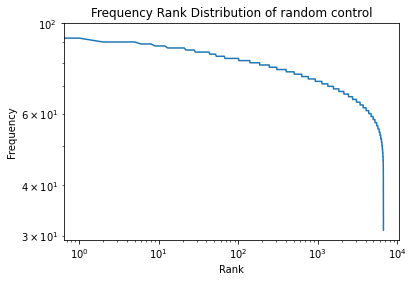

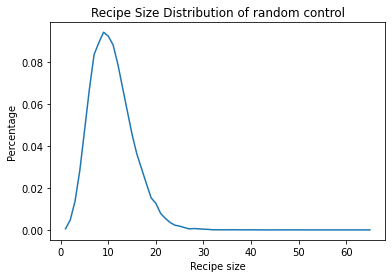

          id     cuisine                                        ingredients
0       3885     italian  [Ragu Classic Alfredo Sauce, tequila, pozole, ...
1      13430   brazilian  [pepper flakes, frozen strawberries, salad gre...
2      13049     mexican  [33% less sodium cooked deli ham, bone-in chic...
3      49282     mexican  [zest, Italian herbs, mango nectar, bass, cond...
4       2253      indian  [kielbasa (not low fat), clove garlic, fine ch...
...      ...         ...                                                ...
39769  12805    japanese                            [butter pecan cake mix]
39770  39221     italian                               [quick-cooking oats]
39771  10816       greek                                     [waffle fries]
39772  39186        thai                                     [t-bone steak]
39773   7833  vietnamese                       [skinless mahi mahi fillets]

[39774 rows x 3 columns]


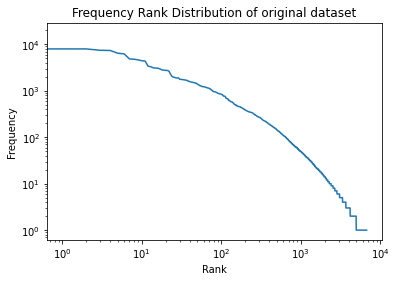

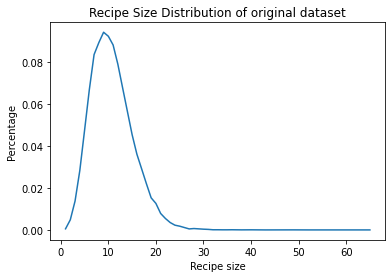

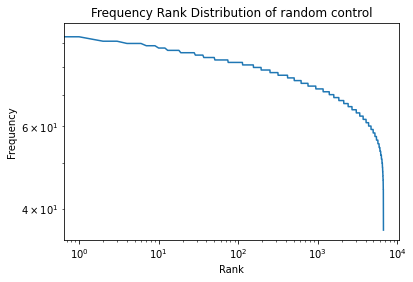

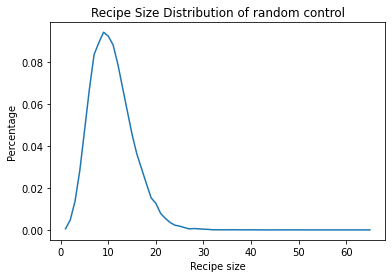

          id     cuisine                                        ingredients
0       3885     italian  [light red kidney beans, parmigiano-reggiano c...
1      13430   brazilian  [nonfat buttermilk, minced meat, reduced fat s...
2      13049     mexican  [shredded carrots, prepar salsa, Bengali 5 Spi...
3      49282     mexican  [coca-cola, muscadet, heirloom squash, vanilla...
4       2253      indian  [fish bones, saltines, strawberries, crab meat...
...      ...         ...                                                ...
39769  12805    japanese                      [vegetarian protein crumbles]
39770  39221     italian                          [frozen artichoke hearts]
39771  10816       greek                                [Jamaican allspice]
39772  39186        thai                       [gluten free lasagna noodle]
39773   7833  vietnamese                                     [banana bread]

[39774 rows x 3 columns]


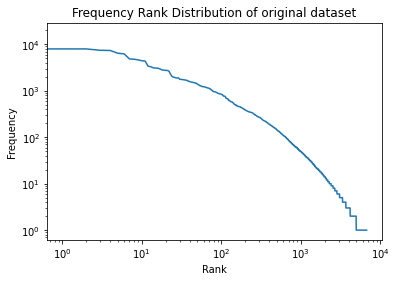

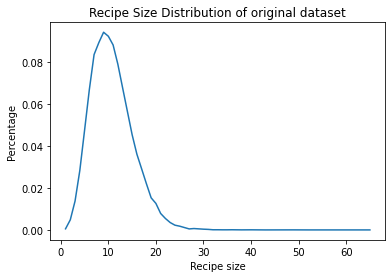

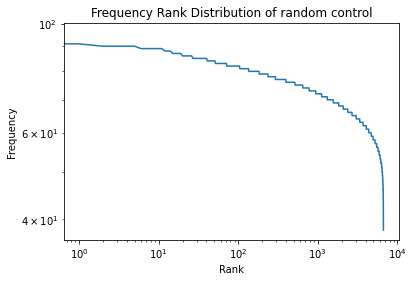

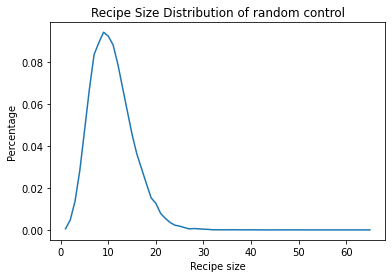

          id     cuisine                                        ingredients
0       3885     italian  [low-fat plain greek yogurt, ground oregano, n...
1      13430   brazilian  [chopped cilantro fresh, masa dough, braising ...
2      13049     mexican  [natural sugar, part-skim mozzarella cheese, s...
3      49282     mexican  [sliced leeks, honeycomb tripe, jamaican rum, ...
4       2253      indian  [organic tomato, ahi tuna steaks, passion frui...
...      ...         ...                                                ...
39769  12805    japanese                                 [hot chili powder]
39770  39221     italian                                      [minced meat]
39771  10816       greek                      [Adobo All Purpose Seasoning]
39772  39186        thai                                      [pepper jack]
39773   7833  vietnamese                                          [risotto]

[39774 rows x 3 columns]


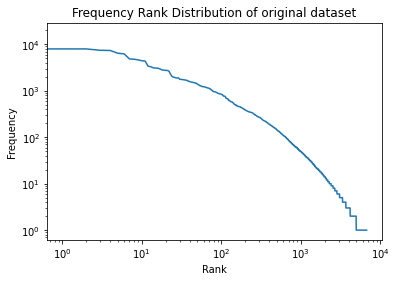

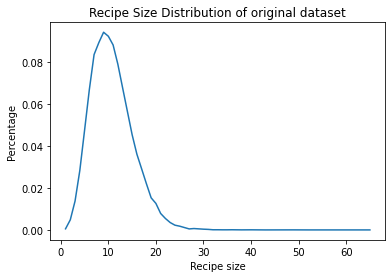

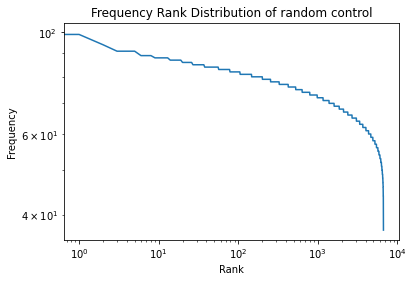

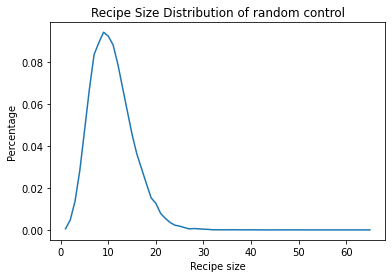

          id     cuisine                                        ingredients
0       3885     italian  [fish stock, Bertolli® Classico Olive Oil, tun...
1      13430   brazilian  [mango chutney, fryers, kielbasa (not low fat)...
2      13049     mexican  [cut up cooked chicken, Marcona almonds, store...
3      49282     mexican  [Philadelphia Cooking Creme, french onion soup...
4       2253      indian  [gold potatoes, Hidden Valley® Greek Yogurt Or...
...      ...         ...                                                ...
39769  12805    japanese                                    [cooked quinoa]
39770  39221     italian                                          [raisins]
39771  10816       greek  [frozen orange juice concentrate, thawed and u...
39772  39186        thai                         [McCormick Parsley Flakes]
39773   7833  vietnamese                                          [melissa]

[39774 rows x 3 columns]


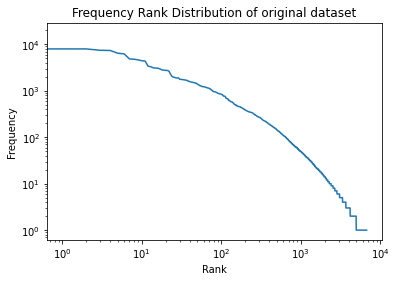

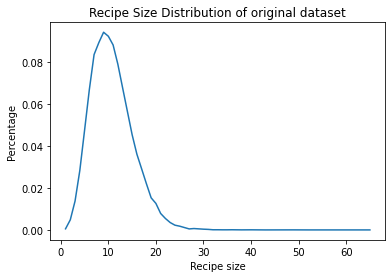

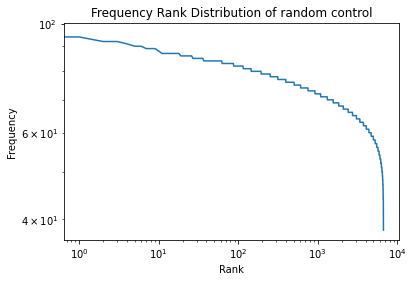

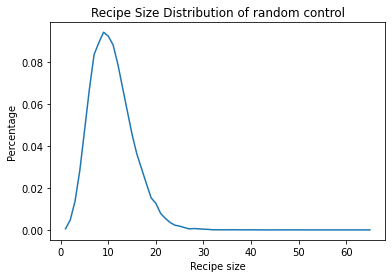

          id     cuisine                                        ingredients
0       3885     italian  [all potato purpos, Old El Paso Enchilada Sauc...
1      13430   brazilian  [rice crackers, frozen seafood, turnips, hunga...
2      13049     mexican  [pike, spring roll wrappers, low-fat parmesan ...
3      49282     mexican  [tallow, cracker meal, whole okra, soup mix, g...
4       2253      indian  [avocado, french toast, shredded low-fat mozza...
...      ...         ...                                                ...
39769  12805    japanese                                       [fingerling]
39770  39221     italian                                       [onion salt]
39771  10816       greek                                        [baby okra]
39772  39186        thai                      [fajita size flour tortillas]
39773   7833  vietnamese                          [thin rice stick noodles]

[39774 rows x 3 columns]


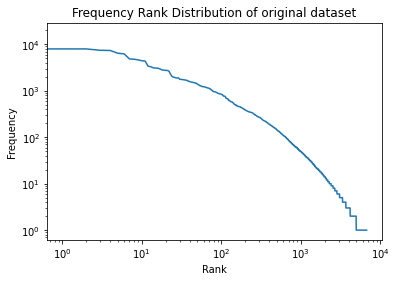

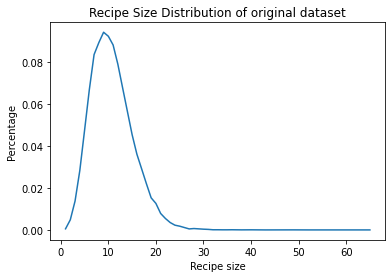

In [89]:
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()
create_RandomCuisine()

Here, we can see that the recipe size distribution is same as the original cuisine but the frequency rank distribution is different. 

Although, the frequency rank distribution of all the random cuisines (here 10 cuisines) are different from the original plot, they are more or less same for all the cuisines. There are slight variations but the internal patter is same throught the randomised control.

# (b)

The random control is built using the strategy 1 as mentioned in the part (a) also.

All the parameters that are kept constant in (a) are kept constant in (b) too along with preserving the frequency of use of ingredients.

This is done by using weighted probability while sampling the ingredients without replacement in the recipes.

The weighted probability ensures that the ingredient with high frequency is chosen more number of times.

In [118]:
def create_RandomCuisine_b():
  # creating the ingredients basket
  ingredient_basket = []
  for ingredient_list in df_ingredients:
    for ingredient in ingredient_list:
      if ingredient in ingredient_basket:
        pass
      else:
        ingredient_basket.append(ingredient)
  weighted = []
  for ingredient in ingredient_basket:
    weighted.append(ingredient_frequency[ingredient])
  new_df = {'id':[],'cuisine':[],'ingredients':[]}
# iterating over all the recipes
  for index,row in df.iterrows():
    size = len(row['ingredients'])
    new_recipe = []
    hell = False

  # sampling ingredients for the recipes using weighted probability
    for i in range(size):
      ingredient = random.choices(ingredient_basket, weights=weighted, k=1)[0]
      index = ingredient_basket.index(ingredient)
      frequency = weighted[index]-1
      if frequency==0:
        weighted.pop(index)
        ingredient_basket.pop(index)
      else:
        weighted[index] = weighted[index]-1
      new_recipe.append(ingredient)
  
    new_df['id'].append(row['id'])
    new_df['cuisine'].append(row['cuisine'])
    new_df['ingredients'].append(new_recipe)

  new_df = pd.DataFrame(new_df)
  plot_frequencyRank(new_df, "Frequency Rank Distribution of random control")
  plot_recipeSize(new_df, "Recipe Size Distribution of random control")
  print(new_df)
  plot_frequencyRank(df,"Frequency Rank Distribution of original dataset")
  plot_recipeSize(df, "Recipe Size Distribution of original dataset")  
  print()

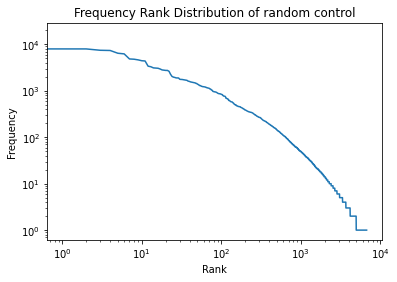

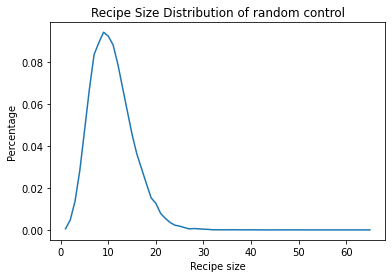

          id     cuisine                                        ingredients
0       3885     italian  [asparagus, onions, medium-grain rice, carrots...
1      13430   brazilian  [eggs, sugar, fresh chives, rice flour, large ...
2      13049     mexican  [garlic cloves, monterey jack, freshly grated ...
3      49282     mexican  [flat leaf parsley, fresh dill, fresh lemon ju...
4       2253      indian  [garlic powder, purple onion, star anise, suga...
...      ...         ...                                                ...
39769  12805    japanese                                      [orange rind]
39770  39221     italian                                           [ginger]
39771  10816       greek                                    [fresh oregano]
39772  39186        thai                                 [ground coriander]
39773   7833  vietnamese                                    [chicken broth]

[39774 rows x 3 columns]


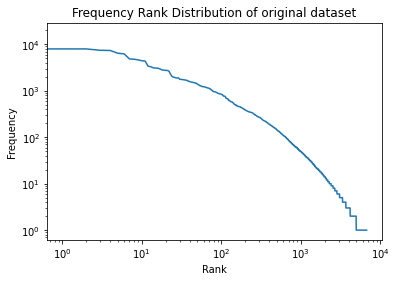

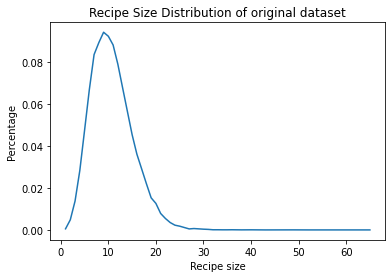

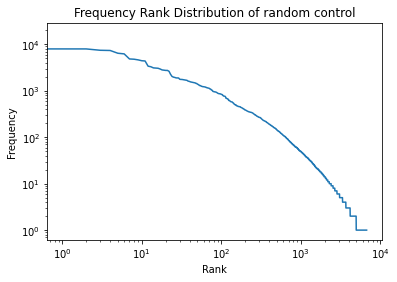

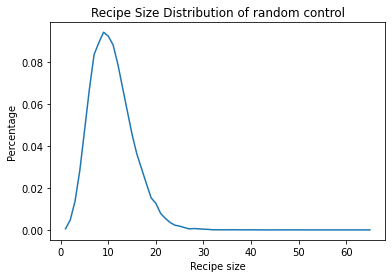

          id     cuisine                                        ingredients
0       3885     italian  [chopped cilantro, dried tarragon leaves, grou...
1      13430   brazilian  [lime juice, ham, fennel seeds, extra-virgin o...
2      13049     mexican  [garlic cloves, onion powder, all-purpose flou...
3      49282     mexican  [red wine vinegar, corn starch, olive oil, gro...
4       2253      indian  [butternut squash, clams, cooked shrimp, chili...
...      ...         ...                                                ...
39769  12805    japanese                                      [baking soda]
39770  39221     italian                                     [green onions]
39771  10816       greek                            [chinese black vinegar]
39772  39186        thai  [reduced fat reduced sodium cream of mushroom ...
39773   7833  vietnamese                                    [garlic cloves]

[39774 rows x 3 columns]


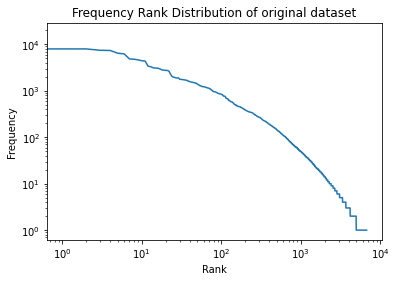

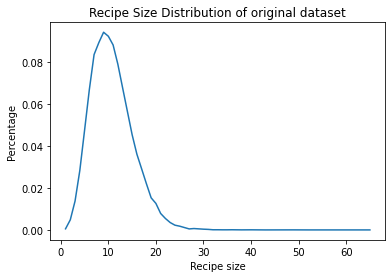

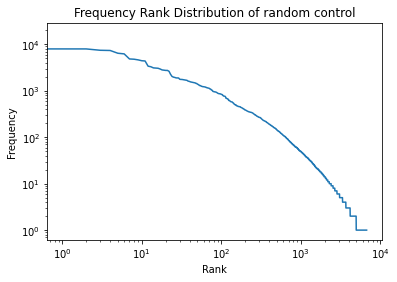

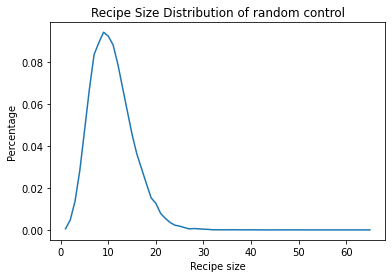

          id     cuisine                                        ingredients
0       3885     italian  [large garlic cloves, penne, pineapple, green ...
1      13430   brazilian  [chopped cilantro, peanut butter, evaporated m...
2      13049     mexican  [chicken stock, baked ham, sugar, eggplant, fr...
3      49282     mexican  [jumbo shrimp, asian fish sauce, butter, penne...
4       2253      indian  [fish fillets, ground cinnamon, coconut milk, ...
...      ...         ...                                                ...
39769  12805    japanese                                     [tomato paste]
39770  39221     italian                                    [plum tomatoes]
39771  10816       greek                                             [soba]
39772  39186        thai                                  [cilantro sprigs]
39773   7833  vietnamese                             [pure vanilla extract]

[39774 rows x 3 columns]


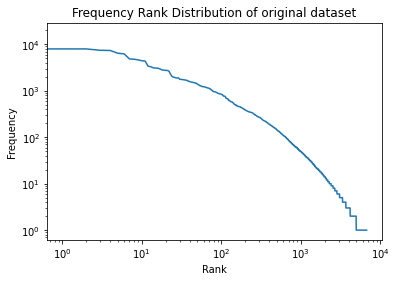

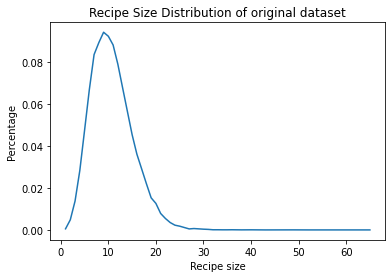

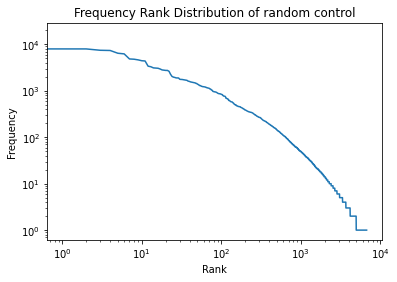

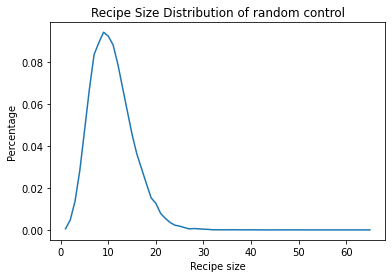

          id     cuisine                                        ingredients
0       3885     italian  [brown rice, coriander seeds, garlic cloves, g...
1      13430   brazilian  [salt, all-purpose flour, whole wheat flour, f...
2      13049     mexican  [olive oil, eggs, plain yogurt, baking soda, t...
3      49282     mexican  [scallions, boneless skinless chicken breasts,...
4       2253      indian  [beef, unsweetened shredded dried coconut, chi...
...      ...         ...                                                ...
39769  12805    japanese                           [extra-virgin olive oil]
39770  39221     italian                                    [fresh parsley]
39771  10816       greek                                [light brown sugar]
39772  39186        thai                                    [chicken stock]
39773   7833  vietnamese                                     [fresh ginger]

[39774 rows x 3 columns]


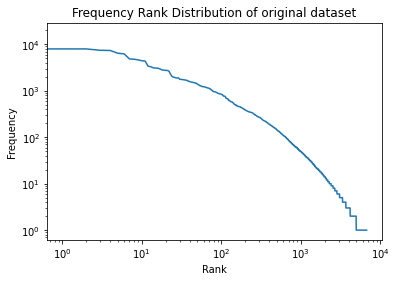

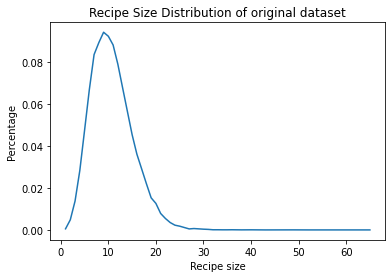

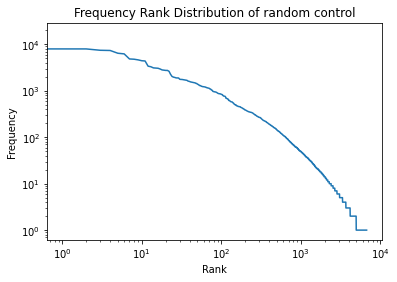

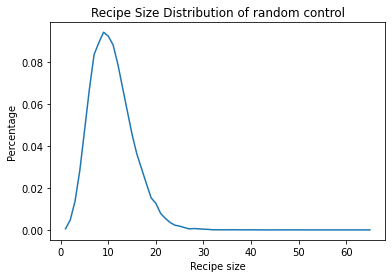

          id     cuisine                                        ingredients
0       3885     italian  [poblano chiles, mild cheddar cheese, Mexican ...
1      13430   brazilian  [cuban peppers, cracked black pepper, yeast, t...
2      13049     mexican  [baguette, shredded cheddar cheese, mushrooms,...
3      49282     mexican  [basil leaves, tomato sauce, kidney beans, war...
4       2253      indian  [lime juice, crushed red pepper flakes, fat sk...
...      ...         ...                                                ...
39769  12805    japanese                                   [dipping sauces]
39770  39221     italian                                           [garlic]
39771  10816       greek                                             [lime]
39772  39186        thai                                  [ground cinnamon]
39773   7833  vietnamese                                     [garam masala]

[39774 rows x 3 columns]


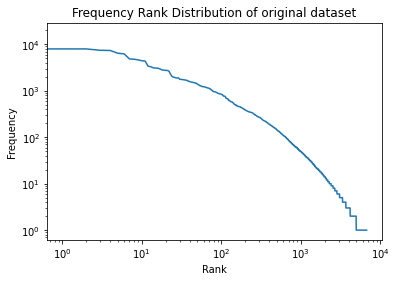

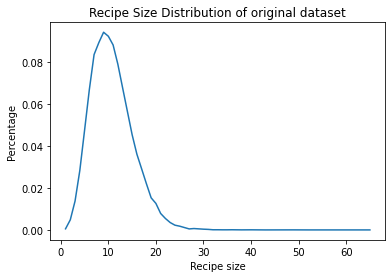

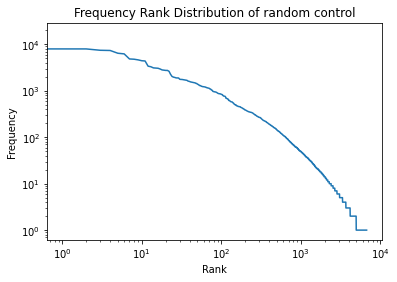

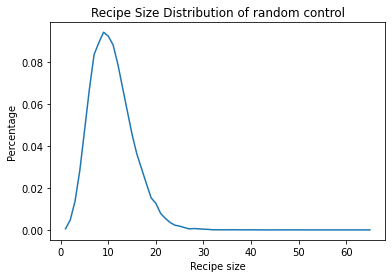

          id     cuisine                                        ingredients
0       3885     italian  [salt, ground black pepper, bread flour, chili...
1      13430   brazilian  [ground ginger, lime juice, garlic cloves, pap...
2      13049     mexican  [pinto beans, garlic, flour, crabmeat, green c...
3      49282     mexican  [vegetable oil, tamarind, lasagna noodles, sca...
4       2253      indian  [meat, garam masala, garlic cloves, ground cum...
...      ...         ...                                                ...
39769  12805    japanese                                   [diced tomatoes]
39770  39221     italian                                    [boiling water]
39771  10816       greek                                       [broccolini]
39772  39186        thai                                     [queso fresco]
39773   7833  vietnamese                                             [salt]

[39774 rows x 3 columns]


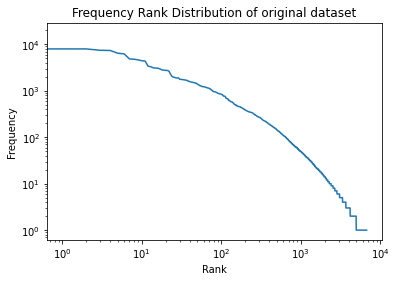

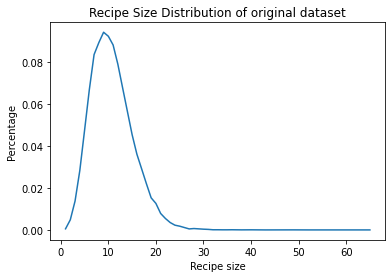

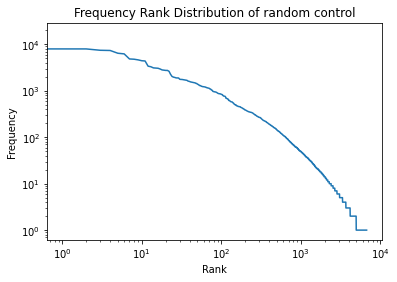

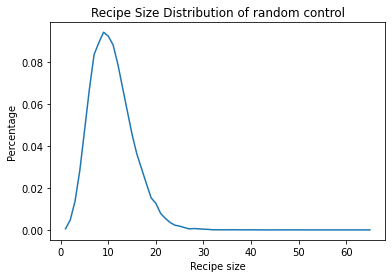

          id     cuisine                                        ingredients
0       3885     italian  [jalapeno chilies, sea salt, pecans, scallions...
1      13430   brazilian  [large eggs, pork tenderloin, jalapeno chilies...
2      13049     mexican  [grated nutmeg, elbow macaroni, ground black p...
3      49282     mexican  [gai lan, water, ground allspice, steak, green...
4       2253      indian  [salt, soy sauce, brown rice, milk, extra-virg...
...      ...         ...                                                ...
39769  12805    japanese                                            [curds]
39770  39221     italian                                        [hot sauce]
39771  10816       greek                           [chopped cilantro fresh]
39772  39186        thai                                             [eggs]
39773   7833  vietnamese                           [extra-virgin olive oil]

[39774 rows x 3 columns]


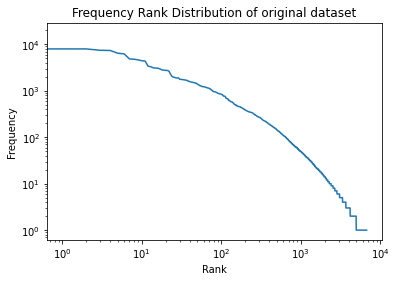

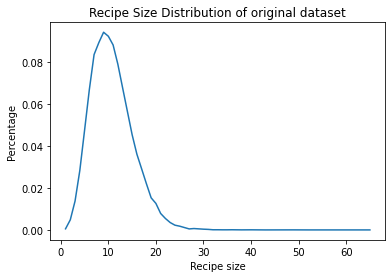

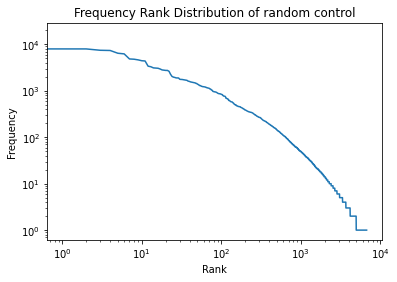

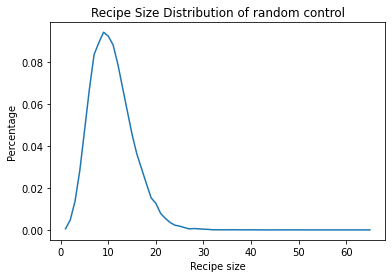

          id     cuisine                                        ingredients
0       3885     italian  [black peppercorns, tomato paste, garlic, baki...
1      13430   brazilian  [fresh corn, mozzarella cheese, fine sea salt,...
2      13049     mexican  [stuffing, salt, white distilled vinegar, wate...
3      49282     mexican  [cilantro, extra-virgin olive oil, peeled fres...
4       2253      indian  [cooking spray, onions, large garlic cloves, g...
...      ...         ...                                                ...
39769  12805    japanese                                  [thick-cut bacon]
39770  39221     italian                                  [vegetable stock]
39771  10816       greek                                           [pepper]
39772  39186        thai                            [freshly ground pepper]
39773   7833  vietnamese                                        [pineapple]

[39774 rows x 3 columns]


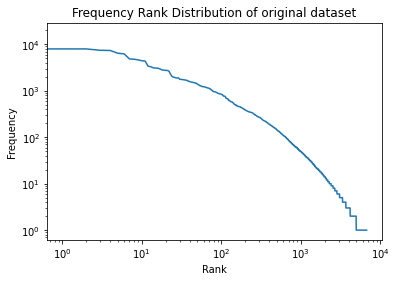

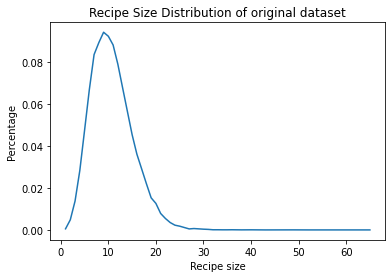

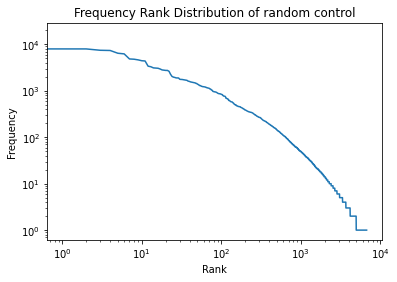

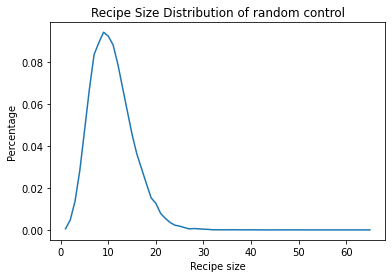

          id     cuisine                                        ingredients
0       3885     italian  [ground pork, salt, salt, raspberries, ketchup...
1      13430   brazilian  [water, turkey meat, garlic paste, Sriracha, e...
2      13049     mexican  [jalapeno chilies, chopped almonds, green onio...
3      49282     mexican  [flat leaf parsley, whole peppercorn, paprika,...
4       2253      indian  [wonton wrappers, green onions, cheddar cheese...
...      ...         ...                                                ...
39769  12805    japanese                                   [corn tortillas]
39770  39221     italian                                     [queso fresco]
39771  10816       greek                                             [eggs]
39772  39186        thai                                [green bell pepper]
39773   7833  vietnamese                           [extra-virgin olive oil]

[39774 rows x 3 columns]


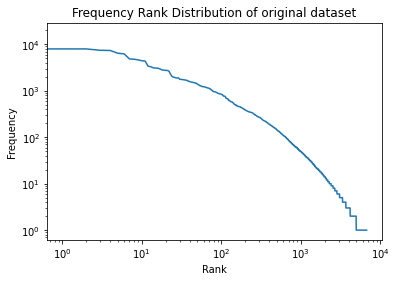

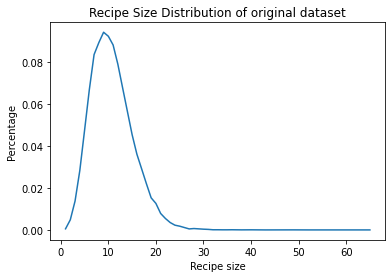

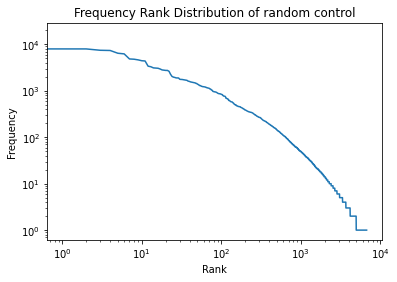

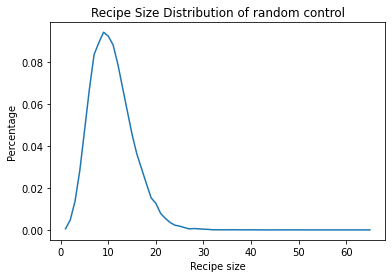

          id     cuisine                                        ingredients
0       3885     italian  [tartar sauce, paprika, chopped cilantro fresh...
1      13430   brazilian  [red pepper flakes, green onions, lemon juice,...
2      13049     mexican  [garlic, capers, frozen corn kernels, fresh gi...
3      49282     mexican  [ground turmeric, chicken broth, stewed tomato...
4       2253      indian  [warm water, beansprouts, garlic, bittersweet ...
...      ...         ...                                                ...
39769  12805    japanese                                         [Sriracha]
39770  39221     italian                                     [garlic paste]
39771  10816       greek                                    [dijon mustard]
39772  39186        thai                                    [cooking spray]
39773   7833  vietnamese                                     [coconut milk]

[39774 rows x 3 columns]


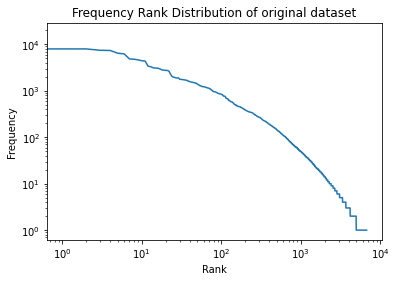

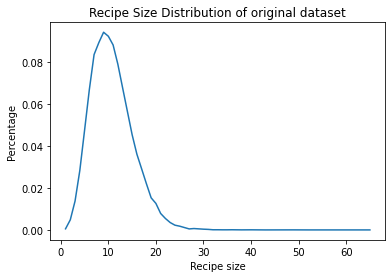

In [119]:
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()
create_RandomCuisine_b()

Here, both the plots are exactly same to each other. This is because along with the recipe size distribution the frequency rank distribution is also kept constant. 

It can be seen that even after sampling the ingredients in the randomised control we get same plots for all the function calls.